In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import math
import time
from datetime import timedelta
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_parquet('example_data2_10000.parquet')

In [5]:
#Put Creation time, drop file path and put in different table and name as Blob_Path

In [6]:
df.head()

,Access_Time,Blob_Key,Scanned_Time,Modified_Time,Size,File_Type,Blob_Path,Current_Tier,Container,Creation_Time,Is_Recent_Record
0,2018-07-18,0,2018-07-18 23:00:00,2018-07-18,30008,CSV,Folder3/File_Num_0.csv,Hot,Container1,2018-07-18,0.0
1,2018-07-25,0,2018-07-25 23:00:00,2018-07-18,30008,CSV,Folder3/File_Num_0.csv,Hot,Container1,2018-07-18,0.0
2,2018-07-26,0,2018-07-26 23:00:00,2018-07-18,30008,CSV,Folder3/File_Num_0.csv,Hot,Container1,2018-07-18,0.0
3,2018-07-27,0,2018-07-27 23:00:00,2018-07-27,24006,CSV,Folder3/File_Num_0.csv,Hot,Container1,2018-07-18,0.0
4,2018-08-01,0,2018-08-01 23:00:00,2018-08-01,16804,CSV,Folder3/File_Num_0.csv,Hot,Container1,2018-07-18,0.0


In [7]:
df['Access_Time'].max()

Timestamp('2021-01-01 00:00:00')

In [8]:
date_split = '2020-03-01'
date_split = datetime.strptime(date_split,'%Y-%m-%d')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847027 entries, 0 to 847026
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Access_Time       847027 non-null  datetime64[ns]
 1   Blob_Key          847027 non-null  int64         
 2   Scanned_Time      847027 non-null  datetime64[ns]
 3   Modified_Time     847027 non-null  datetime64[ns]
 4   Size              847027 non-null  int64         
 5   File_Type         847027 non-null  object        
 6   Blob_Path         847027 non-null  object        
 7   Current_Tier      847027 non-null  object        
 8   Container         847027 non-null  object        
 9   Creation_Time     847027 non-null  datetime64[ns]
 10  Is_Recent_Record  847027 non-null  float64       
dtypes: datetime64[ns](4), float64(1), int64(2), object(4)
memory usage: 77.5+ MB


In [10]:
df_train = df[df['Access_Time']<date_split][['Access_Time','Blob_Key']]
file_keys = df_train['Blob_Key'].unique()
df_test = df[(df['Access_Time']>date_split) & df['Blob_Key'].isin(file_keys)][['Access_Time','Blob_Key']]

In [11]:
len(file_keys)

9927

In [12]:
three_mo_date = date_split + timedelta(days = 90)
three_mo_dataset = df_test[df_test['Access_Time']>three_mo_date]

In [13]:
len(three_mo_dataset['Blob_Key'].unique())

7615

In [14]:
six_mo_date = date_split + timedelta(days = 180)
six_mo_dataset = df_test[df_test['Access_Time']>six_mo_date]
len(six_mo_dataset['Blob_Key'].unique())

5940

In [15]:
[blob_key for blob_key in three_mo_dataset['Blob_Key'].unique() if blob_key not in six_mo_dataset['Blob_Key'].unique()]

[2,
 9,
 10,
 16,
 30,
 33,
 41,
 46,
 50,
 63,
 70,
 72,
 78,
 92,
 97,
 98,
 100,
 103,
 105,
 109,
 117,
 118,
 119,
 152,
 157,
 164,
 166,
 172,
 180,
 190,
 200,
 201,
 206,
 208,
 211,
 212,
 216,
 228,
 229,
 231,
 232,
 235,
 255,
 265,
 268,
 278,
 280,
 291,
 293,
 300,
 301,
 302,
 305,
 316,
 323,
 327,
 333,
 339,
 342,
 346,
 356,
 359,
 364,
 376,
 386,
 392,
 395,
 396,
 397,
 401,
 406,
 422,
 425,
 433,
 434,
 442,
 446,
 455,
 459,
 487,
 488,
 509,
 513,
 514,
 516,
 522,
 531,
 533,
 542,
 543,
 548,
 572,
 573,
 578,
 580,
 585,
 586,
 594,
 602,
 615,
 619,
 624,
 628,
 629,
 638,
 641,
 647,
 649,
 658,
 662,
 665,
 666,
 673,
 679,
 689,
 690,
 696,
 698,
 700,
 704,
 706,
 711,
 731,
 737,
 743,
 747,
 759,
 771,
 774,
 784,
 792,
 794,
 807,
 813,
 814,
 815,
 818,
 831,
 840,
 844,
 845,
 858,
 862,
 867,
 870,
 871,
 875,
 876,
 880,
 881,
 886,
 891,
 892,
 893,
 896,
 897,
 906,
 909,
 917,
 919,
 922,
 926,
 928,
 930,
 932,
 950,
 951,
 952,
 956,
 972

In [16]:
blob_key = 18

In [17]:
y_3 = three_mo_dataset[three_mo_dataset['Blob_Key'] == blob_key].shape[0] > 0
y_6 = six_mo_dataset[six_mo_dataset['Blob_Key'] == blob_key].shape[0] > 0

In [18]:
y_3

True

In [19]:
agg_df_list = []
y_3_list = []
y_6_list = []
for blob_key in file_keys:
    
    blob_df = df_train[df_train['Blob_Key'] == blob_key]
    days_observed = (date_split - blob_df['Access_Time'].min()).days
    
    if blob_df.shape[0]>=3:
        mode_freq = blob_df['Access_Time'].diff().mode()[0].days
        max_freq = blob_df['Access_Time'].diff().max().days
        std_freq = blob_df['Access_Time'].diff().std().days
    else:
        mode_freq = 9999
        max_freq = 9999
        std_freq = 9999
    
    recent_df = blob_df[blob_df['Access_Time'] >= (date_split -  timedelta(days=30))]
    if recent_df.shape[0] >= 3:
        recent_median_freq = blob_df['Access_Time'].diff().median().days
        recent_std_freq = blob_df['Access_Time'].diff().std().days
    else:
        recent_median_freq = 9999
        recent_std_freq = 9999
    
    days_last_access = (date_split - blob_df['Access_Time'].max()).days
    
    y_3 = int(three_mo_dataset[three_mo_dataset['Blob_Key'] == blob_key].shape[0] > 0)
    y_6 = int(six_mo_dataset[six_mo_dataset['Blob_Key'] == blob_key].shape[0] > 0)
    
    agg_df = pd.DataFrame({'Blob_Key':blob_key, 'Mode_Freq':mode_freq, 'Max_Freq':max_freq, 'Std_Freq':std_freq, 'Recent_Median_Freq':recent_median_freq, 'Recent_Std_Freq':recent_std_freq, 'Days_Last_Access':days_last_access,'Days_Observed':days_observed, 'Y_3':y_3, 'Y_6':y_6},index = [blob_key])
    agg_df_list.append(agg_df)

In [20]:
df_agg = pd.concat(agg_df_list)
df_agg.head()

,Blob_Key,Mode_Freq,Max_Freq,Std_Freq,Recent_Median_Freq,Recent_Std_Freq,Days_Last_Access,Days_Observed,Y_3,Y_6
0,0,1,35,8,9999,9999,16,592,1,1
1,1,3,13,1,4,1,2,776,1,1
2,2,32,33,1,9999,9999,22,428,1,0
3,3,60,60,0,9999,9999,32,272,0,0
4,4,1,4,1,2,1,1,331,1,1


In [21]:
df_agg.columns

Index(['Blob_Key', 'Mode_Freq', 'Max_Freq', 'Std_Freq', 'Recent_Median_Freq',
       'Recent_Std_Freq', 'Days_Last_Access', 'Days_Observed', 'Y_3', 'Y_6'],
      dtype='object')

In [22]:
X = df_agg[['Mode_Freq', 'Max_Freq', 'Std_Freq', 'Recent_Median_Freq', 'Recent_Std_Freq', 'Days_Last_Access', 'Days_Observed']]
y_3 = df_agg['Y_3'].astype(int)
y_6 = df_agg['Y_6'].astype(int)

In [23]:
X.isna().sum()

Mode_Freq             0
Max_Freq              0
Std_Freq              0
Recent_Median_Freq    0
Recent_Std_Freq       0
Days_Last_Access      0
Days_Observed         0
dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y_3,test_size = 0.2, random_state = 3)

In [25]:
rf_3 = RandomForestClassifier(n_estimators=300,min_samples_leaf=3)

In [26]:
X_train.isna().sum()

Mode_Freq             0
Max_Freq              0
Std_Freq              0
Recent_Median_Freq    0
Recent_Std_Freq       0
Days_Last_Access      0
Days_Observed         0
dtype: int64

In [27]:
rf_3.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=3, n_estimators=300)

In [55]:
y_pred_3 = rf_3.predict(X_test)

In [78]:
y_pred_baseline_3 = X_test['Days_Last_Access']<=90

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
def print_cm(y_true,y_pred):
    TP = ((y_true == 1) & (y_true == y_pred)).sum()
    TN = ((y_true == 0) & (y_true == y_pred)).sum()
    FP = ((y_pred == 1) & (y_true != y_pred)).sum()
    FN = ((y_pred == 0) & (y_true != y_pred)).sum()
    
    CM_DF = pd.DataFrame(columns = ['Predicted_Active', 'Predicted_Inactive'],index = ['Actually_Active', 'Actually_Inactive'])
    
    CM_DF.loc['Actually_Active','Predicted_Active'] = TP
    CM_DF.loc['Actually_Inactive','Predicted_Inactive'] = TN
    CM_DF.loc['Actually_Inactive','Predicted_Active'] = FP
    CM_DF.loc['Actually_Active','Predicted_Inactive'] = FN
    
    return CM_DF

In [59]:
print_cm(y_test,y_pred_3)

,Predicted_Active,Predicted_Inactive
Actually_Active,1427,85
Actually_Inactive,237,237


In [79]:
print_cm(y_test,y_pred_baseline_3)

,Predicted_Active,Predicted_Inactive
Actually_Active,1425,87
Actually_Inactive,341,133


In [34]:
from sklearn.metrics import plot_roc_curve

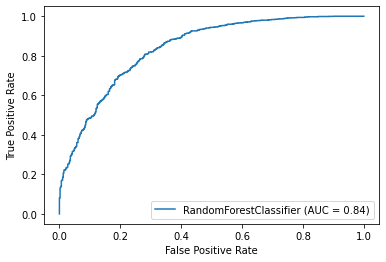

In [35]:
plot_roc_curve(rf_3,X_test,y_test)
plt.show()

In [40]:
y_probs = rf_3.predict_proba(X_test)[:,1] >=0.35

In [41]:
print_cm(y_test,y_probs)

,Predicted_Active,Predicted_Inactive
Actually_Active,1478,34
Actually_Inactive,309,165


In [42]:
from catboost import CatBoostClassifier

In [43]:
cbc3 = CatBoostClassifier()

In [44]:
cbc3.fit(X_train,y_train)

Learning rate set to 0.024956
0:	learn: 0.6753206	total: 140ms	remaining: 2m 20s
1:	learn: 0.6572587	total: 148ms	remaining: 1m 14s
2:	learn: 0.6430669	total: 157ms	remaining: 52.1s
3:	learn: 0.6286602	total: 165ms	remaining: 41.1s
4:	learn: 0.6154811	total: 173ms	remaining: 34.5s
5:	learn: 0.6038985	total: 178ms	remaining: 29.5s
6:	learn: 0.5927933	total: 182ms	remaining: 25.9s
7:	learn: 0.5810176	total: 186ms	remaining: 23.1s
8:	learn: 0.5709138	total: 190ms	remaining: 20.9s
9:	learn: 0.5617965	total: 194ms	remaining: 19.2s
10:	learn: 0.5521466	total: 197ms	remaining: 17.8s
11:	learn: 0.5432213	total: 202ms	remaining: 16.6s
12:	learn: 0.5353896	total: 207ms	remaining: 15.7s
13:	learn: 0.5268766	total: 211ms	remaining: 14.8s
14:	learn: 0.5195975	total: 215ms	remaining: 14.1s
15:	learn: 0.5129738	total: 219ms	remaining: 13.5s
16:	learn: 0.5068488	total: 223ms	remaining: 12.9s
17:	learn: 0.5007144	total: 226ms	remaining: 12.4s
18:	learn: 0.4958726	total: 230ms	remaining: 11.9s
19:	learn

190:	learn: 0.3656729	total: 892ms	remaining: 3.78s
191:	learn: 0.3656030	total: 896ms	remaining: 3.77s
192:	learn: 0.3655321	total: 900ms	remaining: 3.76s
193:	learn: 0.3654681	total: 904ms	remaining: 3.75s
194:	learn: 0.3653765	total: 908ms	remaining: 3.75s
195:	learn: 0.3652682	total: 914ms	remaining: 3.75s
196:	learn: 0.3652070	total: 918ms	remaining: 3.74s
197:	learn: 0.3651417	total: 922ms	remaining: 3.73s
198:	learn: 0.3650969	total: 926ms	remaining: 3.73s
199:	learn: 0.3650040	total: 930ms	remaining: 3.72s
200:	learn: 0.3649039	total: 934ms	remaining: 3.71s
201:	learn: 0.3648267	total: 938ms	remaining: 3.7s
202:	learn: 0.3647260	total: 942ms	remaining: 3.7s
203:	learn: 0.3646668	total: 945ms	remaining: 3.69s
204:	learn: 0.3646211	total: 949ms	remaining: 3.68s
205:	learn: 0.3644483	total: 953ms	remaining: 3.67s
206:	learn: 0.3643742	total: 957ms	remaining: 3.67s
207:	learn: 0.3642591	total: 961ms	remaining: 3.66s
208:	learn: 0.3641495	total: 965ms	remaining: 3.65s
209:	learn: 0.

369:	learn: 0.3515428	total: 1.62s	remaining: 2.76s
370:	learn: 0.3514433	total: 1.62s	remaining: 2.75s
371:	learn: 0.3513505	total: 1.63s	remaining: 2.75s
372:	learn: 0.3512558	total: 1.63s	remaining: 2.74s
373:	learn: 0.3512183	total: 1.63s	remaining: 2.74s
374:	learn: 0.3511346	total: 1.64s	remaining: 2.73s
375:	learn: 0.3511000	total: 1.64s	remaining: 2.73s
376:	learn: 0.3510329	total: 1.65s	remaining: 2.72s
377:	learn: 0.3509584	total: 1.65s	remaining: 2.71s
378:	learn: 0.3508650	total: 1.65s	remaining: 2.71s
379:	learn: 0.3507749	total: 1.66s	remaining: 2.7s
380:	learn: 0.3507048	total: 1.66s	remaining: 2.7s
381:	learn: 0.3506339	total: 1.66s	remaining: 2.69s
382:	learn: 0.3505835	total: 1.67s	remaining: 2.69s
383:	learn: 0.3505109	total: 1.67s	remaining: 2.68s
384:	learn: 0.3504195	total: 1.68s	remaining: 2.68s
385:	learn: 0.3503026	total: 1.68s	remaining: 2.67s
386:	learn: 0.3502141	total: 1.68s	remaining: 2.67s
387:	learn: 0.3501322	total: 1.69s	remaining: 2.66s
388:	learn: 0.

547:	learn: 0.3358093	total: 2.33s	remaining: 1.92s
548:	learn: 0.3357398	total: 2.34s	remaining: 1.92s
549:	learn: 0.3356830	total: 2.34s	remaining: 1.92s
550:	learn: 0.3356146	total: 2.35s	remaining: 1.91s
551:	learn: 0.3355538	total: 2.35s	remaining: 1.91s
552:	learn: 0.3354349	total: 2.35s	remaining: 1.9s
553:	learn: 0.3353671	total: 2.36s	remaining: 1.9s
554:	learn: 0.3352786	total: 2.36s	remaining: 1.9s
555:	learn: 0.3352322	total: 2.37s	remaining: 1.89s
556:	learn: 0.3351578	total: 2.37s	remaining: 1.89s
557:	learn: 0.3350795	total: 2.38s	remaining: 1.88s
558:	learn: 0.3349916	total: 2.38s	remaining: 1.88s
559:	learn: 0.3349378	total: 2.38s	remaining: 1.87s
560:	learn: 0.3348675	total: 2.39s	remaining: 1.87s
561:	learn: 0.3347719	total: 2.39s	remaining: 1.86s
562:	learn: 0.3347116	total: 2.4s	remaining: 1.86s
563:	learn: 0.3346678	total: 2.4s	remaining: 1.86s
564:	learn: 0.3345692	total: 2.41s	remaining: 1.85s
565:	learn: 0.3344918	total: 2.41s	remaining: 1.85s
566:	learn: 0.334

722:	learn: 0.3228363	total: 3.05s	remaining: 1.17s
723:	learn: 0.3227892	total: 3.05s	remaining: 1.16s
724:	learn: 0.3227356	total: 3.06s	remaining: 1.16s
725:	learn: 0.3226554	total: 3.06s	remaining: 1.16s
726:	learn: 0.3226037	total: 3.07s	remaining: 1.15s
727:	learn: 0.3225226	total: 3.07s	remaining: 1.15s
728:	learn: 0.3224933	total: 3.07s	remaining: 1.14s
729:	learn: 0.3224330	total: 3.08s	remaining: 1.14s
730:	learn: 0.3223329	total: 3.08s	remaining: 1.13s
731:	learn: 0.3222722	total: 3.09s	remaining: 1.13s
732:	learn: 0.3222219	total: 3.09s	remaining: 1.13s
733:	learn: 0.3221030	total: 3.1s	remaining: 1.12s
734:	learn: 0.3220214	total: 3.1s	remaining: 1.12s
735:	learn: 0.3219950	total: 3.1s	remaining: 1.11s
736:	learn: 0.3219569	total: 3.11s	remaining: 1.11s
737:	learn: 0.3219187	total: 3.11s	remaining: 1.1s
738:	learn: 0.3218515	total: 3.12s	remaining: 1.1s
739:	learn: 0.3217247	total: 3.12s	remaining: 1.1s
740:	learn: 0.3216683	total: 3.12s	remaining: 1.09s
741:	learn: 0.3216

924:	learn: 0.3102223	total: 3.81s	remaining: 309ms
925:	learn: 0.3101423	total: 3.82s	remaining: 305ms
926:	learn: 0.3100752	total: 3.83s	remaining: 301ms
927:	learn: 0.3099903	total: 3.83s	remaining: 297ms
928:	learn: 0.3099344	total: 3.83s	remaining: 293ms
929:	learn: 0.3098800	total: 3.83s	remaining: 289ms
930:	learn: 0.3097832	total: 3.84s	remaining: 285ms
931:	learn: 0.3097246	total: 3.84s	remaining: 280ms
932:	learn: 0.3096563	total: 3.85s	remaining: 276ms
933:	learn: 0.3095745	total: 3.85s	remaining: 272ms
934:	learn: 0.3095144	total: 3.85s	remaining: 268ms
935:	learn: 0.3094234	total: 3.86s	remaining: 264ms
936:	learn: 0.3093831	total: 3.86s	remaining: 260ms
937:	learn: 0.3093491	total: 3.87s	remaining: 256ms
938:	learn: 0.3092894	total: 3.87s	remaining: 251ms
939:	learn: 0.3092209	total: 3.87s	remaining: 247ms
940:	learn: 0.3091486	total: 3.88s	remaining: 243ms
941:	learn: 0.3090590	total: 3.88s	remaining: 239ms
942:	learn: 0.3089798	total: 3.88s	remaining: 235ms
943:	learn: 

In [53]:
y_pred_cbc_3 = cbc3.predict(X_test)

In [54]:
print_cm(y_test,y_pred_cbc_3)

,Predicted_Active,Predicted_Inactive
Actually_Active,1431,81
Actually_Inactive,228,246


In [61]:
print_cm(y_test,y_pred_3)

,Predicted_Active,Predicted_Inactive
Actually_Active,1427,85
Actually_Inactive,237,237


In [64]:
X_train, X_test, y_train_6, y_test_6 = train_test_split(X,y_6,test_size = 0.2, random_state = 3)

In [65]:
cbc6 = CatBoostClassifier()

In [66]:
cbc6.fit(X_train,y_train_6)
y_pred_cbc_6 = cbc6.predict(X_test)

Learning rate set to 0.024956
0:	learn: 0.6842743	total: 7.96ms	remaining: 7.95s
1:	learn: 0.6755421	total: 14.2ms	remaining: 7.07s
2:	learn: 0.6672871	total: 19.9ms	remaining: 6.62s
3:	learn: 0.6598218	total: 25.1ms	remaining: 6.24s
4:	learn: 0.6523353	total: 29.7ms	remaining: 5.91s
5:	learn: 0.6451276	total: 34ms	remaining: 5.64s
6:	learn: 0.6388102	total: 38.8ms	remaining: 5.5s
7:	learn: 0.6326394	total: 43.6ms	remaining: 5.41s
8:	learn: 0.6265798	total: 48.5ms	remaining: 5.34s
9:	learn: 0.6207917	total: 52.5ms	remaining: 5.2s
10:	learn: 0.6152151	total: 56.9ms	remaining: 5.11s
11:	learn: 0.6102176	total: 63.8ms	remaining: 5.25s
12:	learn: 0.6055815	total: 70.2ms	remaining: 5.33s
13:	learn: 0.6008884	total: 74.6ms	remaining: 5.25s
14:	learn: 0.5959826	total: 79.1ms	remaining: 5.19s
15:	learn: 0.5926026	total: 82.9ms	remaining: 5.1s
16:	learn: 0.5887510	total: 88ms	remaining: 5.09s
17:	learn: 0.5849895	total: 93.5ms	remaining: 5.1s
18:	learn: 0.5814417	total: 98ms	remaining: 5.06s
19

175:	learn: 0.4915869	total: 720ms	remaining: 3.37s
176:	learn: 0.4914821	total: 723ms	remaining: 3.36s
177:	learn: 0.4913985	total: 728ms	remaining: 3.36s
178:	learn: 0.4913676	total: 732ms	remaining: 3.36s
179:	learn: 0.4912954	total: 736ms	remaining: 3.35s
180:	learn: 0.4911551	total: 742ms	remaining: 3.36s
181:	learn: 0.4910716	total: 746ms	remaining: 3.35s
182:	learn: 0.4909194	total: 750ms	remaining: 3.35s
183:	learn: 0.4908636	total: 754ms	remaining: 3.34s
184:	learn: 0.4907771	total: 759ms	remaining: 3.34s
185:	learn: 0.4906210	total: 763ms	remaining: 3.34s
186:	learn: 0.4905591	total: 767ms	remaining: 3.33s
187:	learn: 0.4904126	total: 770ms	remaining: 3.33s
188:	learn: 0.4902106	total: 774ms	remaining: 3.32s
189:	learn: 0.4901439	total: 778ms	remaining: 3.32s
190:	learn: 0.4900289	total: 782ms	remaining: 3.31s
191:	learn: 0.4899686	total: 786ms	remaining: 3.31s
192:	learn: 0.4899062	total: 790ms	remaining: 3.3s
193:	learn: 0.4898173	total: 794ms	remaining: 3.3s
194:	learn: 0.

353:	learn: 0.4772378	total: 1.44s	remaining: 2.63s
354:	learn: 0.4771186	total: 1.45s	remaining: 2.63s
355:	learn: 0.4770411	total: 1.45s	remaining: 2.63s
356:	learn: 0.4769678	total: 1.46s	remaining: 2.62s
357:	learn: 0.4769010	total: 1.46s	remaining: 2.62s
358:	learn: 0.4768434	total: 1.47s	remaining: 2.62s
359:	learn: 0.4767835	total: 1.47s	remaining: 2.61s
360:	learn: 0.4767485	total: 1.47s	remaining: 2.61s
361:	learn: 0.4766881	total: 1.48s	remaining: 2.6s
362:	learn: 0.4766049	total: 1.48s	remaining: 2.6s
363:	learn: 0.4764961	total: 1.49s	remaining: 2.6s
364:	learn: 0.4763833	total: 1.49s	remaining: 2.59s
365:	learn: 0.4763199	total: 1.49s	remaining: 2.59s
366:	learn: 0.4761933	total: 1.5s	remaining: 2.58s
367:	learn: 0.4761248	total: 1.5s	remaining: 2.58s
368:	learn: 0.4760977	total: 1.5s	remaining: 2.57s
369:	learn: 0.4760216	total: 1.51s	remaining: 2.57s
370:	learn: 0.4758864	total: 1.51s	remaining: 2.57s
371:	learn: 0.4758617	total: 1.52s	remaining: 2.56s
372:	learn: 0.4757

529:	learn: 0.4616896	total: 2.17s	remaining: 1.92s
530:	learn: 0.4615501	total: 2.17s	remaining: 1.92s
531:	learn: 0.4614717	total: 2.17s	remaining: 1.91s
532:	learn: 0.4613448	total: 2.18s	remaining: 1.91s
533:	learn: 0.4612783	total: 2.18s	remaining: 1.9s
534:	learn: 0.4611713	total: 2.19s	remaining: 1.9s
535:	learn: 0.4610329	total: 2.19s	remaining: 1.9s
536:	learn: 0.4609077	total: 2.19s	remaining: 1.89s
537:	learn: 0.4607559	total: 2.2s	remaining: 1.89s
538:	learn: 0.4606569	total: 2.2s	remaining: 1.89s
539:	learn: 0.4605668	total: 2.21s	remaining: 1.88s
540:	learn: 0.4604969	total: 2.21s	remaining: 1.88s
541:	learn: 0.4603614	total: 2.22s	remaining: 1.87s
542:	learn: 0.4603169	total: 2.22s	remaining: 1.87s
543:	learn: 0.4602438	total: 2.22s	remaining: 1.86s
544:	learn: 0.4602242	total: 2.23s	remaining: 1.86s
545:	learn: 0.4601321	total: 2.23s	remaining: 1.86s
546:	learn: 0.4600231	total: 2.24s	remaining: 1.85s
547:	learn: 0.4598921	total: 2.24s	remaining: 1.85s
548:	learn: 0.459

701:	learn: 0.4478675	total: 2.89s	remaining: 1.23s
702:	learn: 0.4477763	total: 2.89s	remaining: 1.22s
703:	learn: 0.4477164	total: 2.89s	remaining: 1.22s
704:	learn: 0.4475932	total: 2.9s	remaining: 1.21s
705:	learn: 0.4475023	total: 2.9s	remaining: 1.21s
706:	learn: 0.4474001	total: 2.9s	remaining: 1.2s
707:	learn: 0.4473357	total: 2.91s	remaining: 1.2s
708:	learn: 0.4473235	total: 2.91s	remaining: 1.2s
709:	learn: 0.4472277	total: 2.92s	remaining: 1.19s
710:	learn: 0.4471468	total: 2.92s	remaining: 1.19s
711:	learn: 0.4470356	total: 2.93s	remaining: 1.18s
712:	learn: 0.4469627	total: 2.93s	remaining: 1.18s
713:	learn: 0.4468847	total: 2.93s	remaining: 1.18s
714:	learn: 0.4467832	total: 2.94s	remaining: 1.17s
715:	learn: 0.4466894	total: 2.94s	remaining: 1.17s
716:	learn: 0.4465929	total: 2.95s	remaining: 1.16s
717:	learn: 0.4465251	total: 2.95s	remaining: 1.16s
718:	learn: 0.4464310	total: 2.96s	remaining: 1.16s
719:	learn: 0.4463341	total: 2.96s	remaining: 1.15s
720:	learn: 0.4462

882:	learn: 0.4351086	total: 3.61s	remaining: 479ms
883:	learn: 0.4350703	total: 3.62s	remaining: 475ms
884:	learn: 0.4349944	total: 3.62s	remaining: 471ms
885:	learn: 0.4349361	total: 3.63s	remaining: 467ms
886:	learn: 0.4348459	total: 3.63s	remaining: 463ms
887:	learn: 0.4347659	total: 3.63s	remaining: 459ms
888:	learn: 0.4346958	total: 3.64s	remaining: 454ms
889:	learn: 0.4346143	total: 3.64s	remaining: 450ms
890:	learn: 0.4345894	total: 3.65s	remaining: 447ms
891:	learn: 0.4345106	total: 3.65s	remaining: 442ms
892:	learn: 0.4344182	total: 3.66s	remaining: 438ms
893:	learn: 0.4343664	total: 3.66s	remaining: 434ms
894:	learn: 0.4342784	total: 3.67s	remaining: 430ms
895:	learn: 0.4341965	total: 3.67s	remaining: 426ms
896:	learn: 0.4341145	total: 3.67s	remaining: 422ms
897:	learn: 0.4340400	total: 3.68s	remaining: 418ms
898:	learn: 0.4339763	total: 3.68s	remaining: 414ms
899:	learn: 0.4338488	total: 3.69s	remaining: 410ms
900:	learn: 0.4337559	total: 3.69s	remaining: 406ms
901:	learn: 

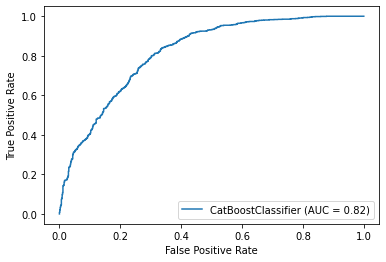

In [83]:
plot_roc_curve(cbc6,X_test,y_test_6)
plt.show()

In [67]:
print_cm(y_test_6,y_pred_cbc_6)

,Predicted_Active,Predicted_Inactive
Actually_Active,1042,166
Actually_Inactive,295,483


In [104]:
y_predict_safe = cbc6.predict_proba(X_test)[:,1] >=0.13

In [105]:
print_cm(y_test_6,y_predict_safe)

,Predicted_Active,Predicted_Inactive
Actually_Active,1196,12
Actually_Inactive,612,166


In [81]:
y_pred_baseline_6 = X_test['Days_Last_Access']<=180
print_cm(y_test_6,y_pred_baseline_6)

,Predicted_Active,Predicted_Inactive
Actually_Active,1193,15
Actually_Inactive,731,47


In [154]:
table1 = df.drop(columns = 'Blob_Path')

In [155]:
final_date = date_split + timedelta(days = 180)

In [157]:
table1 = table1[table1['Access_Time'] <= final_date]

In [158]:
table1.head()

,Access_Time,Blob_Key,Scanned_Time,Modified_Time,Size,File_Type,Current_Tier,Container,Creation_Time,Is_Recent_Record
0,2018-07-18,0,2018-07-18 23:00:00,2018-07-18,30008,CSV,Hot,Container1,2018-07-18,0.0
1,2018-07-25,0,2018-07-25 23:00:00,2018-07-18,30008,CSV,Hot,Container1,2018-07-18,0.0
2,2018-07-26,0,2018-07-26 23:00:00,2018-07-18,30008,CSV,Hot,Container1,2018-07-18,0.0
3,2018-07-27,0,2018-07-27 23:00:00,2018-07-27,24006,CSV,Hot,Container1,2018-07-18,0.0
4,2018-08-01,0,2018-08-01 23:00:00,2018-08-01,16804,CSV,Hot,Container1,2018-07-18,0.0


In [173]:
agg_df_list = []
y_3_list = []
y_6_list = []
for blob_key in file_keys:
    
    blob_df = table1[table1['Blob_Key'] == blob_key]
    days_observed = (final_date - blob_df['Access_Time'].min()).days
    
    if blob_df.shape[0]>=3:
        mode_freq = blob_df['Access_Time'].diff().mode()[0].days
        max_freq = blob_df['Access_Time'].diff().max().days
        std_freq = blob_df['Access_Time'].diff().std().days
    else:
        mode_freq = 9999
        max_freq = 9999
        std_freq = 9999
    
    recent_df = blob_df[blob_df['Access_Time'] >= (final_date -  timedelta(days=30))]
    if recent_df.shape[0] >= 3:
        recent_median_freq = blob_df['Access_Time'].diff().median().days
        recent_std_freq = blob_df['Access_Time'].diff().std().days
    else:
        recent_median_freq = 9999
        recent_std_freq = 9999
    
    days_last_access = (final_date - blob_df['Access_Time'].max()).days
    
    y_3 = int(three_mo_dataset[three_mo_dataset['Blob_Key'] == blob_key].shape[0] > 0)
    y_6 = int(six_mo_dataset[six_mo_dataset['Blob_Key'] == blob_key].shape[0] > 0)
    
    agg_df = pd.DataFrame({'Blob_Key':blob_key, 'Mode_Freq':mode_freq, 'Max_Freq':max_freq, 'Std_Freq':std_freq, 'Recent_Median_Freq':recent_median_freq, 'Recent_Std_Freq':recent_std_freq, 'Days_Last_Access':days_last_access,'Days_Observed':days_observed, 'Y_3':y_3, 'Y_6':y_6},index = [blob_key])
    agg_df_list.append(agg_df)

In [174]:
df_agg_final = pd.concat(agg_df_list)

In [175]:
features = ['Mode_Freq', 'Max_Freq', 'Std_Freq', 'Recent_Median_Freq', 'Recent_Std_Freq', 'Days_Last_Access', 'Days_Observed']

In [176]:
X_final = df_agg_final[['Mode_Freq', 'Max_Freq', 'Std_Freq', 'Recent_Median_Freq', 'Recent_Std_Freq', 'Days_Last_Access', 'Days_Observed']]

In [177]:
df_agg_final['Inactive_6mo_prob'] = cbc6.predict_proba(X_final)[:,0]
df_agg_final['Inactive_6mo'] = cbc6.predict_proba(X_final)[:,0] >= 0.85

In [178]:
df_agg_final = df_agg_final.drop(columns = ['Y_3', 'Y_6'])

In [179]:
df_agg_final.head()

,Blob_Key,Mode_Freq,Max_Freq,Std_Freq,Recent_Median_Freq,Recent_Std_Freq,Days_Last_Access,Days_Observed,Inactive_6mo_prob,Inactive_6mo
0,0,1,35,8,9999,9999,14,772,0.091113,False
1,1,2,17,2,4,2,0,956,0.014449,False
2,2,32,33,1,9999,9999,46,608,0.608263,False
3,3,60,60,0,9999,9999,152,452,0.909721,True
4,4,1,5,1,1,1,0,511,0.026721,False


In [180]:
path_df = df[['Blob_Key','Blob_Path']].drop_duplicates()

In [181]:
df_agg_final = df_agg_final.merge(path_df, how = 'left', on = 'Blob_Key')

In [182]:
df_agg_final.head()

,Blob_Key,Mode_Freq,Max_Freq,Std_Freq,Recent_Median_Freq,Recent_Std_Freq,Days_Last_Access,Days_Observed,Inactive_6mo_prob,Inactive_6mo,Blob_Path
0,0,1,35,8,9999,9999,14,772,0.091113,False,Folder3/File_Num_0.csv
1,1,2,17,2,4,2,0,956,0.014449,False,Folder1/File_Num_1.csv
2,2,32,33,1,9999,9999,46,608,0.608263,False,Folder1/Sub_Folder3/File_Num_2.csv
3,3,60,60,0,9999,9999,152,452,0.909721,True,Folder3/Sub_Folder2/File_Num_3.csv
4,4,1,5,1,1,1,0,511,0.026721,False,Folder3/File_Num_4.csv


In [183]:
table2 = df_agg_final

In [184]:
table1.to_csv('table1_model2.csv')

In [185]:
table2.to_csv('table2_model2.csv')

In [186]:
table1['Access_Time'].max()

Timestamp('2020-08-28 00:00:00')

In [272]:
total_size = table1.groupby(['Scanned_Time'])['Size'].sum().to_frame()

In [273]:
total_size

,Size
Scanned_Time,
2018-01-01 23:00:00,385614
2018-01-02 23:00:00,925138
2018-01-03 23:00:00,454309
2018-01-04 23:00:00,810206
2018-01-05 23:00:00,816045
...,...
2020-08-24 23:00:00,5996841220558
2020-08-25 23:00:00,6109720876006
2020-08-26 23:00:00,5881039560201


In [274]:
def bollinger_strat(data, window, no_of_std):
    rolling_mean = data['Size'].rolling(window).mean()
    rolling_std = data['Size'].rolling(window).std()

    data['Bollinger_High'] = rolling_mean + (rolling_std * no_of_std)
    data['Bollinger_Low'] = rolling_mean - (rolling_std * no_of_std)
    
    return data


In [275]:
df.head()

,Access_Time,Blob_Key,Scanned_Time,Modified_Time,Size,File_Type,Blob_Path,Current_Tier,Container,Creation_Time,Is_Recent_Record,Bollinger High,Bollinger Low
0,2018-07-18,0,2018-07-18 23:00:00,2018-07-18,30008,CSV,Folder3/File_Num_0.csv,Hot,Container1,2018-07-18,0.0,NaN,NaN
1,2018-07-25,0,2018-07-25 23:00:00,2018-07-18,30008,CSV,Folder3/File_Num_0.csv,Hot,Container1,2018-07-18,0.0,NaN,NaN
2,2018-07-26,0,2018-07-26 23:00:00,2018-07-18,30008,CSV,Folder3/File_Num_0.csv,Hot,Container1,2018-07-18,0.0,NaN,NaN
3,2018-07-27,0,2018-07-27 23:00:00,2018-07-27,24006,CSV,Folder3/File_Num_0.csv,Hot,Container1,2018-07-18,0.0,NaN,NaN
4,2018-08-01,0,2018-08-01 23:00:00,2018-08-01,16804,CSV,Folder3/File_Num_0.csv,Hot,Container1,2018-07-18,0.0,NaN,NaN


In [276]:
total_size = bollinger_strat(total_size, 10, 2)

In [277]:
total_size.head()

,Size,Bollinger_High,Bollinger_Low
Scanned_Time,,,
2018-01-01 23:00:00,385614,NaN,NaN
2018-01-02 23:00:00,925138,NaN,NaN
2018-01-03 23:00:00,454309,NaN,NaN
2018-01-04 23:00:00,810206,NaN,NaN
2018-01-05 23:00:00,816045,NaN,NaN


(737180.0, 737760.0)

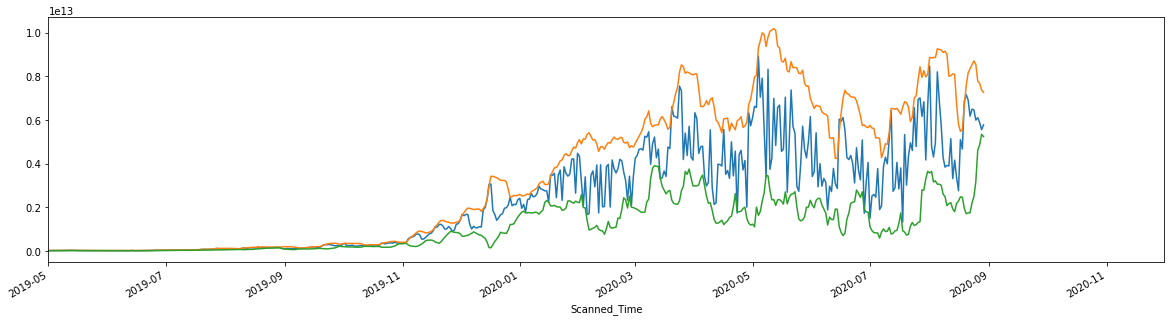

In [278]:
total_size['Size'].plot(figsize=(20,5))
total_size['Bollinger_High'].plot(figsize=(20,5))
total_size['Bollinger_Low'].plot(figsize=(20,5))
plt.xlim(['2019-05-01','2020-12-01'])

In [279]:
total_size['Size'].ewm(com = 3.5).mean().tail(30)

Scanned_Time
2020-07-30 23:00:00    5.816899e+12
2020-07-31 23:00:00    6.405625e+12
2020-08-01 23:00:00    6.048958e+12
2020-08-02 23:00:00    5.662243e+12
2020-08-03 23:00:00    5.508439e+12
2020-08-04 23:00:00    6.108431e+12
2020-08-05 23:00:00    6.282183e+12
2020-08-06 23:00:00    6.168231e+12
2020-08-07 23:00:00    5.750433e+12
2020-08-08 23:00:00    5.326926e+12
2020-08-09 23:00:00    5.015746e+12
2020-08-10 23:00:00    4.767683e+12
2020-08-11 23:00:00    4.852691e+12
2020-08-12 23:00:00    4.512571e+12
2020-08-13 23:00:00    4.434652e+12
2020-08-14 23:00:00    4.198917e+12
2020-08-15 23:00:00    3.881117e+12
2020-08-16 23:00:00    4.153090e+12
2020-08-17 23:00:00    4.268501e+12
2020-08-18 23:00:00    4.842991e+12
2020-08-19 23:00:00    5.357439e+12
2020-08-20 23:00:00    5.705702e+12
2020-08-21 23:00:00    5.810788e+12
2020-08-22 23:00:00    5.963399e+12
2020-08-23 23:00:00    6.074732e+12
2020-08-24 23:00:00    6.057423e+12
2020-08-25 23:00:00    6.069045e+12
2020-08-26 23:0

In [245]:
days_consider = 60

In [246]:
x = list(range(1,days_consider+1))

In [247]:
y = list(total_size['Size'].ewm(com = 3.5).mean().tail(days_consider))

In [257]:
y_upper = list(total_size['Bollinger_High'].ewm(com = 3.5).mean().tail(days_consider))

In [266]:
y_lower = list(total_size['Bollinger_Low'].ewm(com = 3.5).mean().tail(days_consider))

In [248]:
from scipy import interpolate

In [249]:
f = interpolate.interp1d(x, y, fill_value = "extrapolate")

In [258]:
f_upper = interpolate.interp1d(x, y_upper, fill_value = "extrapolate")

In [267]:
f_lower = interpolate.interp1d(x, y_lower, fill_value = "extrapolate")

In [262]:
indexes = [15,30,60]

In [255]:
mean_size = [f(x) for x in indexes]

In [259]:
upper_size = [f_upper(x) for x in indexes]

In [268]:
lower_size = [f_lower(x) for x in indexes]

In [270]:
size_prediction_df = pd.DataFrame({'Predicted_Size':mean_size,'Prediction_Upper_Band':upper_size, 'Prediction_Lower_Band':lower_size},index=indexes).reset_index().rename(columns = {'index':'Days_In_Future'})

In [271]:
size_prediction_df.to_csv('Size_Prediction.csv')

In [281]:
total_size.to_csv('Size_History.csv')